In [1]:
import pandas as pd
import pickle
import numpy as np
import nltk
import re
import itertools
import bisect
from datetime import datetime
from nltk.tokenize.casual import TweetTokenizer
from nltk.collocations import TrigramCollocationFinder

#from pattern.en import parse,mood,sentiment,mood,modality
#from pattern.en import pprint 

import sys

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import svm
from sklearn.linear_model import LassoCV,LogisticRegression,Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

In [2]:
with open("../responsedata/responsedata.txt",'rb') as f:
        testresp_bin= pickle.load(f) 

In [3]:
X_features_df = pd.DataFrame(X_features)

In [8]:
X_features_df.columns = [' complexitytokens', 'token_num', 'chunk_str','pmiscore', 'polar', 'adj', 'mood_num', 'modal']

In [76]:
X_features_df

54706

In [75]:
len(X_features_df[X_features_df['mood_num']==0.3])

54706

In [23]:
y_descale = [y_num/60 for y_num in y]
np.mean(y_descale)

361.48000524013213

In [110]:
np.corrcoef(y_descale,X_features_df[''])#, 'token_num', 'polar', 'adj', 'modal']])

array([[  1.00000000e+00,  -7.67557977e-17],
       [ -7.67557977e-17,   1.00000000e+00]])

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X_features_df[[' complexitytokens', 'token_num', 'polar', 'adj', 'modal']], y_descale, test_size=0.3, random_state=1)

In [87]:
X_train.shape

(38294, 5)

clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)

In [88]:
reg = linear_model.Lasso(alpha = 1)
reg.fit(X_train,y_train)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [89]:
reg.coef_

array([  0.        ,   0.15567853,  52.96095231,  13.86121642, -23.23719059])

In [90]:
reg.score(X_train,y_train)
reg.score(X_train,y_train)

0.0035737804535741491

In [92]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(reg,X_features_df[[' complexitytokens', 'token_num', 'polar', 'adj', 'modal']],y_descale, cv=5)

In [93]:
scores

array([-0.02259252, -0.0008257 , -0.00135114, -0.03484603, -0.00116891])

In [91]:
print (r2_score(y_test,reg.predict(X_test)))
print (r2_score(y_train,reg.predict(X_train)))

0.00377744244156
0.00357378045357


In [32]:
lasso = Lasso(random_state=0)
alphas = np.logspace(-4, -0.5, 30)

tuned_parameters = [{'alpha': alphas}]
n_folds = 3
clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(X_features_df[[' complexitytokens', 'token_num', 'polar', 'adj', 'mood_num', 'modal']], y_descale)
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']

In [33]:
scores

array([ -2.02259101e-04,  -2.02197224e-04,  -2.02117538e-04,
        -2.02008647e-04,  -2.01866364e-04,  -2.01683053e-04,
        -2.01432396e-04,  -2.01104970e-04,  -2.00684126e-04,
        -2.00106837e-04,  -1.99353605e-04,  -1.98387129e-04,
        -1.97060382e-04,  -1.95327705e-04,  -1.93043259e-04,
        -1.90029936e-04,  -1.86056434e-04,  -1.80818980e-04,
        -1.73919329e-04,  -1.64836614e-04,  -1.52891743e-04,
        -1.37203131e-04,  -1.16633029e-04,  -8.97249672e-05,
        -5.46356710e-05,  -9.07044862e-06,   4.97580404e-05,
         1.25141403e-04,   2.20596277e-04,   3.39534524e-04])

In [ ]:
def loo_risk(X,y,regmod):
    """
    Construct the leave-one-out square error risk for a regression model
    
    Input: design matrix, X, response vector, y, a regression model, regmod
    Output: scalar LOO risk
    """
    loo = LeaveOneOut()
    loo_losses = []
    for train_index, test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        regmod.fit(X_train,y_train)
        y_hat = regmod.predict(X_test)
        loss = np.sum((y_hat - y_test)**2)
        loo_losses.append(loss)
    return np.mean(loo_losses)

def emp_risk(X,y,regmod):
    """
    Return the empirical risk for square error loss
    
    Input: design matrix, X, response vector, y, a regression model, regmod
    Output: scalar empirical risk
    """
    regmod.fit(X,y)
    y_hat = regmod.predict(X)
    return np.mean((y_hat - y)**2)

# reply or not model analysis

In [3]:
def flatten_comments_dict(comments_dict):
    flattened = []
    projects = sorted(comments_dict.keys())
    for project in projects:
        comment_list = comments_dict[project]
        for d in comment_list:
            flattened.append(d)

    return flattened


In [4]:
flatten_testresp_bin = flatten_comments_dict(testresp_bin)
flatten_testresp_bin_df = pd.DataFrame(flatten_testresp_bin).dropna()

In [5]:
testresp_bin.keys()

dict_keys(['sass_sass', 'karpathy_convnetjs', 'facebook_relay', 'jquery_jquery-mobile', 'futurice_android-best-practices', 'segmentio_nightmare', 'slackhq_SlackTextViewController', 'minimaxir_big-list-of-naughty-strings', 'prakhar1989_awesome-courses', 'realm_realm-cocoa', 'junegunn_fzf', 'nodejitsu_node-http-proxy', 'node-inspector_node-inspector', 'loverajoel_jstips', 'sitaramc_gitolite', 'zxing_zxing', 'mozilla_pdf.js', 'kennethreitz_requests', 'sovereign_sovereign', 'svg_svgo', 'tobiasahlin_SpinKit', 'herrbischoff_awesome-osx-command-line', 'teamcapybara_capybara', 'scrapy_scrapy', 'jwagner_smartcrop.js', 'reactjs_react-redux', 'ptmt_react-native-macos', 'h5bp_Front-end-Developer-Interview-Questions', 'sindresorhus_awesome', 'jigish_slate', 'mperham_sidekiq', 't4t5_sweetalert', 'hashicorp_consul'])

In [6]:
flatten_testresp_bin_df.columns
#float(df['m_auth_score'][0])

Index(['cumulative_mentions', 'datetime', 'degrees_between', 'issue_num',
       'login', 'm_btwn_cent', 'm_deg_cent', 'm_indeg', 'm_indeg_cent',
       'm_outdeg', 'mention_login', 'mentionlogin_commit', 'project',
       'replied', 'resp_bin', 'resp_time', 'timedif', 'tk_body', 'top_n_class',
       'top_n_metric_value', 'top_n_rank', 'top_n_rank_cutoff'],
      dtype='object')

## Network Variable Description

#### degree_centrality(G, nodes)
Compute the degree centrality for nodes in a bipartite network.
The degree centrality for a node v is the fraction of nodes connected to it.

#### betweenness_centrality(G, nodes)
Compute betweenness centrality for nodes in a bipartite network.
Betweenness centrality of a node v is the sum of the fraction of all-pairs shortest paths that pass through v. Values of betweenness are normalized by the maximum possible value which for bipartite graphs is limited by the relative size of the two node sets.

#### hits_numpy(G, normalized=True)
Return HITS hubs and authorities values for nodes.
The HITS algorithm computes two numbers for a node. Authorities estimates the node value based on the
incoming links. Hubs estimates the node value based on outgoing links

两个非邻接的成员间的相互作用依赖于网络中的其他成员，特别是位于两成员之间路径上的那些成员。它们对这两个非邻接成员的相互作用具有某种控制和制约作用。Freeman (1979)认为中间成员对路径两端的成员具有“更大的人际关系影响”。该指标的思想是：如果一个成员位于其他成员的多条最短路上，那么该成员就是核心成员，就具有较大的中间度核心性。Anthonisse(1971)[8]和Freeman(1977)[9]首先对该思想进行了量化。假设：①各条线路的权系数相等；②通讯过程中总是走最短路径；③当存在不止一条最短路时，每一条的使用概率相等；中间度核心性的本质是：网络中包含成员i 的所有最短路的条数占所有最短路条数的百分比。它表示成员i 的控制能力，或起着“gatekeeping”作用的概率。也可以理解为：成员j要到达网络中的所有其他成员，对成员i的依赖性的大小，或是成员i 对成员j 与网络中的其它成员进行相互作用的控制能力。

In [12]:
y = flatten_testresp_bin_df["resp_bin"]
X = flatten_testresp_bin_df[["degrees_between","m_btwn_cent","m_deg_cent","m_indeg","m_indeg_cent","m_outdeg","replied",'mentionlogin_commit']].astype(float)

In [110]:
data_time = flatten_testresp_bin_df[flatten_testresp_bin_df['tiemdif']!='NA']
data_time.shape
y_time = np.asarray(data_time['tiemdif'])
x_time = np.asarray(data_time[["m_auth_score","m_btwn_cent","m_deg_cent","m_hub_score","m_indeg","m_indeg_cent","m_outdeg","reply_before"]].astype(float))

In [111]:
x_time

array([[  1.27520836e-01,   1.13095238e-01,   6.08333333e-01,
          1.09162370e-01,   3.80000000e+01,   3.16666667e-01,
          3.50000000e+01,   0.00000000e+00],
       [  1.29833915e-01,   1.21625344e-01,   6.36363636e-01,
          1.02566531e-01,   4.20000000e+01,   3.47107438e-01,
          3.50000000e+01,   0.00000000e+00],
       [ -0.00000000e+00,   0.00000000e+00,   7.81250000e-03,
         -0.00000000e+00,   1.00000000e+00,   7.81250000e-03,
          0.00000000e+00,   0.00000000e+00],
       [ -6.55016202e-17,   3.52272727e-01,   1.00000000e+00,
          8.09016994e-01,   6.00000000e+00,   5.00000000e-01,
          6.00000000e+00,   0.00000000e+00],
       [ -4.08985297e-16,   3.52272727e-01,   1.08333333e+00,
          8.09016994e-01,   7.00000000e+00,   5.83333333e-01,
          6.00000000e+00,   1.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   9.09090909e-02,
          0.00000000e+00,   1.00000000e+00,   9.09090909e-02,
          0.00000000e+00,   0.0

In [102]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
#X['reply_before'] = 
#le.fit_transform(X['reply_before'])
#X['reply_before']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)
#X_time_train, X_time_test, y_time_train, y_time_test = train_test_split(X,y_time, test_size=0.3, random_state=1)

In [ ]:
clf = svm.SVC(kernel='linear', C=1)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

In [46]:
clf.coef_

array([[  8.26145835e-01,   0.00000000e+00,   7.36899722e-01, ...,
          7.36899722e-01,   0.00000000e+00,   0.00000000e+00],
       [  9.12661913e-02,  -1.97743415e-02,  -1.52110319e-02, ...,
          4.56330957e-02,  -3.65064765e-01,   0.00000000e+00],
       [  5.00000000e-01,   0.00000000e+00,   5.00000000e-01, ...,
          5.00000000e-01,   0.00000000e+00,   0.00000000e+00],
       ..., 
       [  0.00000000e+00,   0.00000000e+00,  -6.84899351e-03, ...,
         -6.84899351e-03,   0.00000000e+00,  -9.99953053e-01],
       [  0.00000000e+00,  -3.62441296e-03,  -2.43040212e-03, ...,
         -1.21520106e-03,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   4.72366556e-05,  -9.45205479e-03, ...,
         -6.30136986e-03,   0.00000000e+00,   0.00000000e+00]])

In [9]:
import statsmodels.api as sm
from statsmodels.formula.api import Logit, probit, poisson, ols

/Users/thalia/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [19]:
X.corr()

,degrees_between,m_btwn_cent,m_deg_cent,m_indeg,m_indeg_cent,m_outdeg,replied,mentionlogin_commit
degrees_between,1.000000,0.077884,0.190554,0.609808,0.323103,0.167321,0.257920,0.217161
m_btwn_cent,0.077884,1.000000,0.319854,0.389812,0.227853,0.484738,0.004924,0.337821
m_deg_cent,0.190554,0.319854,1.000000,0.342119,0.874977,0.304617,0.185216,0.174518
m_indeg,0.609808,0.389812,0.342119,1.000000,0.442847,0.588874,0.189657,0.492170
m_indeg_cent,0.323103,0.227853,0.874977,0.442847,1.000000,0.145695,0.209303,0.194558
m_outdeg,0.167321,0.484738,0.304617,0.588874,0.145695,1.000000,0.103846,0.371820
replied,0.257920,0.004924,0.185216,0.189657,0.209303,0.103846,1.000000,0.086077
mentionlogin_commit,0.217161,0.337821,0.174518,0.492170,0.194558,0.371820,0.086077,1.000000


In [10]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [14]:
sm_log = Logit(y_train,X_train).fit()
print(sm_log.summary())

Optimization terminated successfully.
         Current function value: 0.664006
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               resp_bin   No. Observations:                28362
Model:                          Logit   Df Residuals:                    28354
Method:                           MLE   Df Model:                            7
Date:                Wed, 14 Feb 2018   Pseudo R-squ.:                 0.01079
Time:                        18:03:37   Log-Likelihood:                -18833.
converged:                       True   LL-Null:                       -19038.
                                        LLR p-value:                 1.202e-84
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
degrees_between         0.0003   6.24e-05      5.409      0.000       0.000       0.000
m_

In [113]:
sm_log_time = ols(y_time,x_time).fit()
print(sm_log_time.summary())

PatsyError: model is missing required outcome variables

In [21]:
reglog = LogisticRegression()
reglog.fit(X_train,y_train)
print("score: %f" %reglog.score(X_test, y_test))
print(reglog.coef_)
y_pred = reglog.predict(X_test)
accuracy = np.sum(y_pred == y_test) / y_test.shape[0]
print("predicted accuracy: %f" %accuracy)

score: 0.605627
[[  3.11239367e-04   8.64575813e-01   8.67333053e-02  -8.43197815e-05
   -1.34057258e-01   1.41213072e-04   1.05927933e-01   2.48714880e-05]]
predicted accuracy: 0.605627


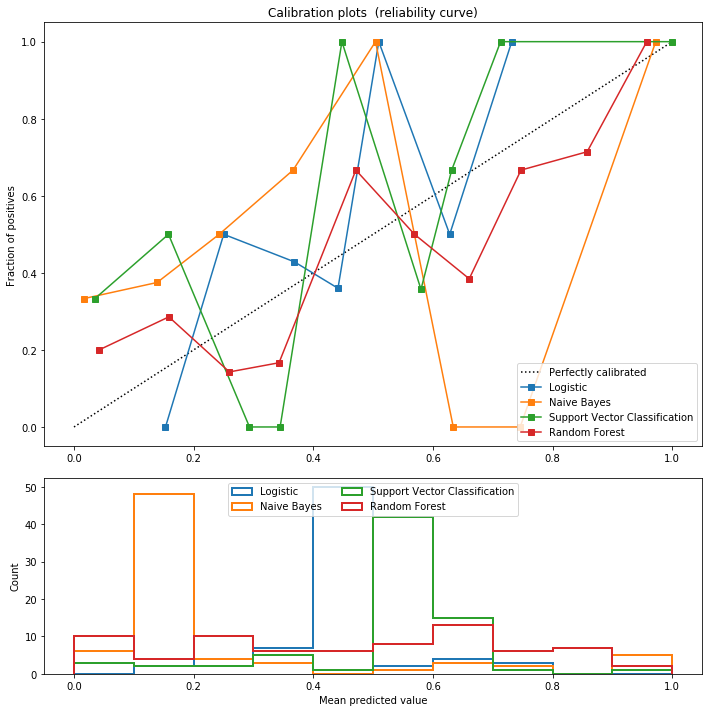

In [57]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

lr = LogisticRegression()
gnb = GaussianNB()
svc = LinearSVC(C=1.0)
rfc = RandomForestClassifier(n_estimators=100)


# #############################################################################
# Plot calibration plots

plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
for clf, name in [(lr, 'Logistic'),
                  (gnb, 'Naive Bayes'),
                  (svc, 'Support Vector Classification'),
                  (rfc, 'Random Forest')]:
    clf.fit(X_train, y_train)
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(X_test)[:, 1]
    else:  # use decision function
        prob_pos = clf.decision_function(X_test)
        prob_pos = \
            (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    fraction_of_positives, mean_predicted_value = \
        calibration_curve(y_test, prob_pos, n_bins=10)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
             label="%s" % (name, ))

    ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
             histtype="step", lw=2)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()
plt.show()

In [59]:
sum(y)/len(y)

0.44957983193277312